In [1]:
pip install pandas matplotlib wordcloud nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from collections import Counter

nltk.download("punkt")

# Load preprocessed summarization data
with open("summarization_data.json", "r") as f:
    summarization_data = json.load(f)

# Load preprocessed Q&A data
with open("qa_data.json", "r") as f:
    qa_data = json.load(f)

# Convert to DataFrames
summ_df = pd.DataFrame(summarization_data)
qa_df = pd.DataFrame(qa_data)

# Compute word count distributions
summ_df["article_word_count"] = summ_df["article"].apply(lambda x: len(x.split()))
summ_df["summary_word_count"] = summ_df["summary"].apply(lambda x: len(x.split()))
qa_df["context_word_count"] = qa_df["context"].apply(lambda x: len(x.split()))
qa_df["question_word_count"] = qa_df["question"].apply(lambda x: len(x.split()))
qa_df["answer_word_count"] = qa_df["answer"].apply(lambda x: len(x.split()))




[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


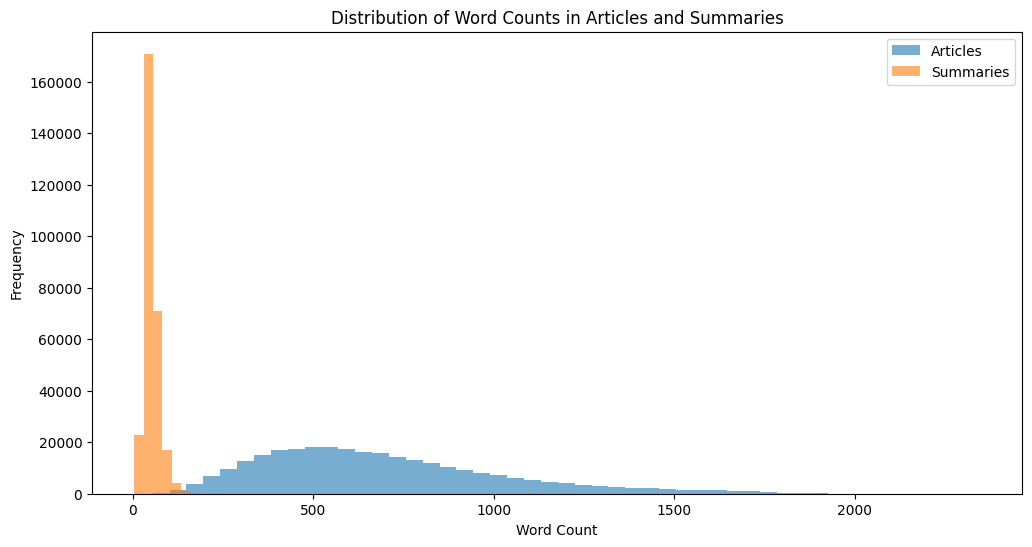

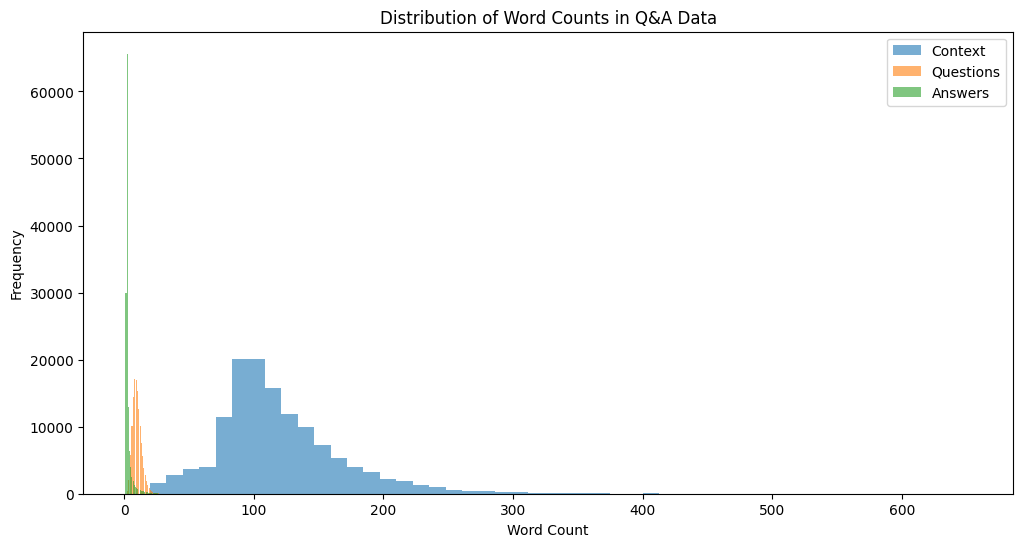

In [3]:
# Plot histograms for word counts
plt.figure(figsize=(12, 6))
plt.hist(summ_df["article_word_count"], bins=50, alpha=0.6, label="Articles")
plt.hist(summ_df["summary_word_count"], bins=50, alpha=0.6, label="Summaries")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts in Articles and Summaries")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(qa_df["context_word_count"], bins=50, alpha=0.6, label="Context")
plt.hist(qa_df["question_word_count"], bins=50, alpha=0.6, label="Questions")
plt.hist(qa_df["answer_word_count"], bins=50, alpha=0.6, label="Answers")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts in Q&A Data")
plt.legend()
plt.show()

In [ ]:
top_question_types = question_type_counts.nlargest(10)  # Show only top 10 types

plt.figure(figsize=(10, 5))
plt.bar(top_question_types.index, top_question_types.values, color='blue')
plt.xlabel("Question Type")
plt.ylabel("Frequency")
plt.title("Top 10 Question Types in Q&A Dataset")
plt.xticks(rotation=45)
plt.show()


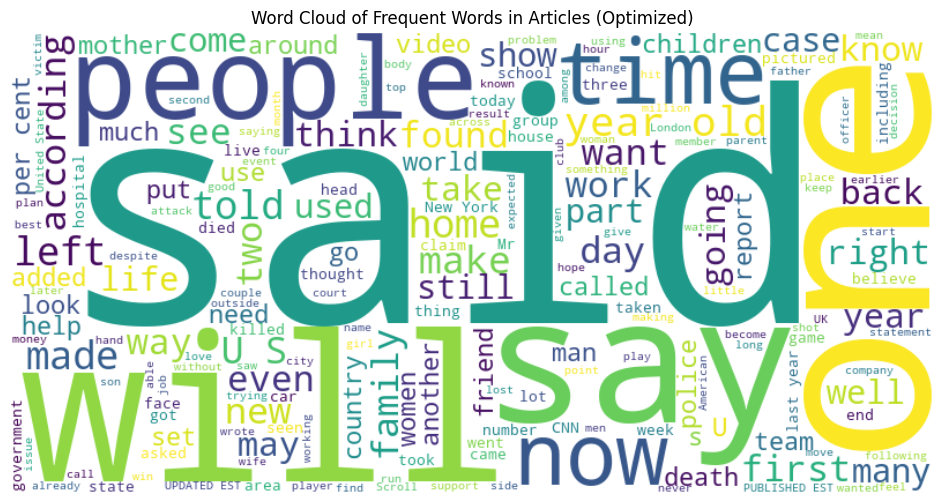

In [4]:
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample a fraction of the dataset for faster processing (adjust fraction as needed)
sample_articles = summ_df["article"].sample(frac=0.1, random_state=42).tolist()

# Join sampled articles into text
text_data = " ".join(sample_articles)

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Frequent Words in Articles (Optimized)")
plt.show()


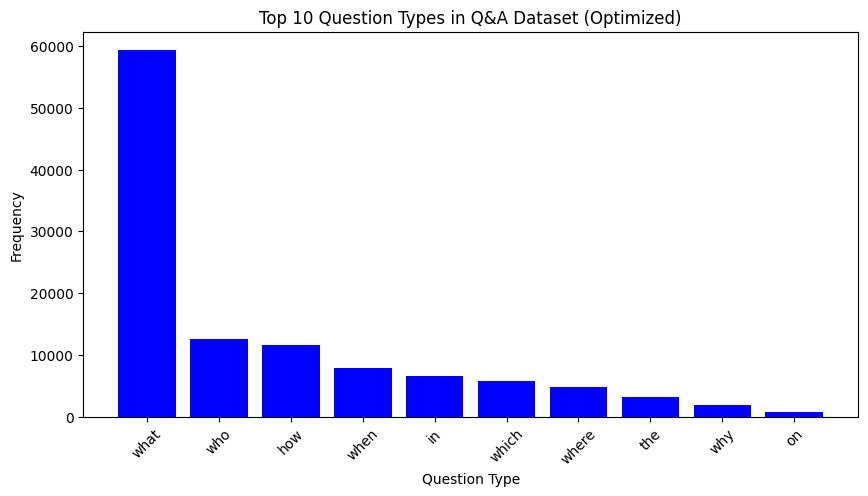

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the first word of each question
qa_df["question_type"] = qa_df["question"].str.split().str[0].str.lower()

# Count occurrences and get the top 10 question types
top_question_types = qa_df["question_type"].value_counts().nlargest(10)

# Plot optimized question-type distribution
plt.figure(figsize=(10, 5))
plt.bar(top_question_types.index, top_question_types.values, color='blue')
plt.xlabel("Question Type")
plt.ylabel("Frequency")
plt.title("Top 10 Question Types in Q&A Dataset (Optimized)")
plt.xticks(rotation=45)
plt.show()
